In [132]:
import pandas as pd

In [133]:
import numpy as np

In [134]:
import matplotlib.pyplot as plt

In [135]:
import seaborn as sns

In [136]:
new = r"C:\Users\Kush baba the great\Desktop\Datashapa\datasets\Diwali Sales Data.csv"

In [137]:
df = pd.read_csv(new,encoding = "unicode_escape")

In this project we will analyse the dataset containing sales in India during Diwali (traditional festival) season. We will start doing some initial exploration of data and then proceed to data cleaning. We will then carry out EDA and try to understand more about the dependent varaible in this case "Amount" and also the relationship it has with other independent variables. 

INITIAL DATA EXPLORATION

In [138]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [140]:
df.shape

(11251, 15)

After an initial exploration I can see the column "Amount" contains few Null values and columns "Status" and "Unanmed1" does not have any value at all so need to be dropped.There is some discrepancy in the column naming convention that need to be fixed. The datatype of the columns are in good order. 

DATA CLEANING

Drop duplicate

In [141]:
df.duplicated().sum()

8

In [142]:
df.drop_duplicates()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


Drop columns 

In [143]:
df = df.drop(["User_ID","Cust_name","Status","unnamed1"],axis = 1)

In [144]:
df.head()

,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


Drop Null Values 

In [145]:
df.isnull().sum()

Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [146]:
df.dropna(inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_ID        11239 non-null  object 
 1   Gender            11239 non-null  object 
 2   Age Group         11239 non-null  object 
 3   Age               11239 non-null  int64  
 4   Marital_Status    11239 non-null  int64  
 5   State             11239 non-null  object 
 6   Zone              11239 non-null  object 
 7   Occupation        11239 non-null  object 
 8   Product_Category  11239 non-null  object 
 9   Orders            11239 non-null  int64  
 10  Amount            11239 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.0+ MB


Column name cleaning 

In [148]:
df.columns = df.columns.str.strip().str.title().str.replace(" ","_")

In [149]:
df.head(10)

,Product_Id,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


Remove whitestrip from each categoriacal column value 

In [150]:
df["Gender"] = df["Gender"].str.strip()

In [151]:
df["Age_Group"] = df["Age_Group"].str.strip()

In [152]:
df["State"] = df["State"].str.strip()

In [153]:
df["Zone"] = df["Zone"].str.strip()

In [154]:
df["Occupation"] = df["Occupation"].str.strip()

In [155]:
df["Product_Category"] = df["Product_Category"].str.strip()

EDA -----------------------------------------------------------------------------------------------------------------------

We will treat the "Amount" column as our dependent variable and will study the relationship with other independent variables to see how they can influence the money being spent. Let's start by analysis our dependent variable first and then we will check each of the independent variable and their impact. 
We will ignore the following columns "User_Id", "Cust_Name" as they are iirelevant for this analysis 

Univariate analysis on "Amount" -----------------------------------------------------------------------------------------

In [156]:
df["Amount"].describe()

count    11239.000000
mean      9453.610858
std       5222.355869
min        188.000000
25%       5443.000000
50%       8109.000000
75%      12675.000000
max      23952.000000
Name: Amount, dtype: float64

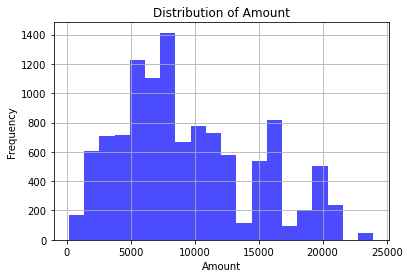

In [157]:
plt.hist(df["Amount"], bins=20, color='blue',alpha = 0.7)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.grid(True)
plt.show()

In [158]:
skewness_Amount = df['Amount'].skew()

In [159]:
kurtosis_Amount = df['Amount'].kurtosis()

In [160]:
print(skewness_Amount)

0.5580257366658408


The value of 0.55 suggest it's slightlly a positively skewed distribution as we can see from the histogram so the concentration of data is more on the left side. Most of the clients have spent between that 5k to 10k range and fewer customer spent on the 15k to 20k region 

In [161]:
print(kurtosis_Amount)

-0.5402092965421801


Negative kurtosis indicates less tail heaviness so flatter distribution compared to normal. This also means less outliers so less variability in the tails and broader central peak. This just reconfirms what we have found in the skewness figure, that of less outliers.

BOX PLOT

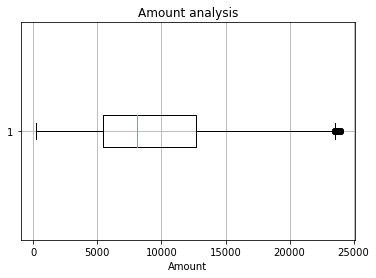

In [162]:
plt.boxplot(df["Amount"], vert=False)
plt.xlabel('Amount')
plt.title('Amount analysis')
plt.grid(True)
plt.show()

The median line is close to lower quartile that confirms it's a right-skewed distribution.Few black dots also confirm the presence of few outliers

FINAL SUMMARY FROM UNIVARIATE ANALYSIS: we understand the dependent variable's distribution is positively skewed and it's flatter compared to normal one. Money spent by each customer falls heavily in the range of £5k - £10k with gradually less people spending between £15k to £20k. Some outliars can be noticed just before the £25k point. 

BIVARIATE ANALYSIS --------------------------------------------------------------------------------------------------

Find the correlation of each independent variable with variable "Amount"

AMOUNT SPENT BY EACH GENDER

In [203]:
gender_sums = df.groupby("Gender")["Amount"].sum()

In [205]:
print(gender_sums)

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64


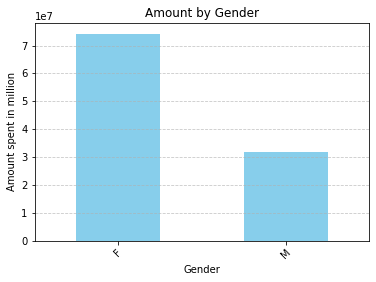

In [216]:
gender_sums.plot(kind="bar",color="skyblue")
plt.xlabel('Gender')
plt.ylabel('Amount spent in million')
plt.title('Amount by Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AMOUNT SPENT BY EACH AGE GROUP

In [207]:
Age_g = df.groupby("Age_Group")["Amount"].sum()

In [208]:
print(Age_g)

Age_Group
0-17      2699653.00
18-25    17240732.00
26-35    42613443.94
36-45    22144995.49
46-50     9207844.00
51-55     8261477.00
55+       4080987.00
Name: Amount, dtype: float64


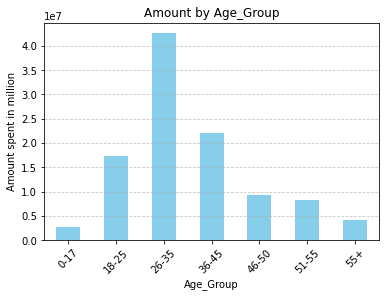

In [218]:
Age_g.plot(kind="bar",color="skyblue")
plt.xlabel('Age_Group')
plt.ylabel('Amount spent in million')
plt.title('Amount by Age_Group')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [249]:
x = df["Age"]

In [250]:
y = df["Amount"]

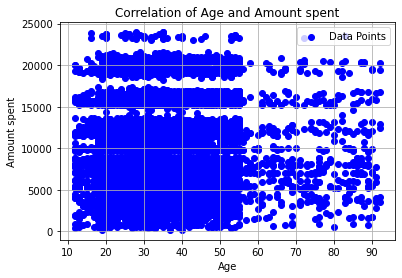

In [252]:
plt.scatter(x, y, c='blue', marker='o', label='Data Points')
plt.xlabel('Age')
plt.ylabel('Amount spent')
plt.title('Correlation of Age and Amount spent')
plt.legend()
plt.grid(True)
plt.show()

Scatterplot analysis: There isn't any positive or negative linear relationship between age and amount being spent so it's not the best chart to use for any further insight. It's clearly visible most amount of money spent are by the relatively younger generation (<50) but no slope (+ or -) is visible 

AMOUNT SPENT BY MARITAL STATUS

In [212]:
mar_stat = df.groupby("Marital_Status")["Amount"].sum()

In [213]:
print(mar_stat)

Marital_Status
0    62125386.44
1    44123745.99
Name: Amount, dtype: float64


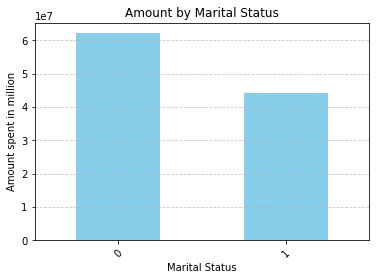

In [219]:
mar_stat.plot(kind="bar",color="skyblue")
plt.xlabel('Marital Status')
plt.ylabel('Amount spent in million')
plt.title('Amount by Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Revenue by geographical location - I will focus only on State and ignore the Zone. As we see below a Zone can contain quite a few cities and a non performing city might end up in a high performing Zone which will distort the analysis and induce us to take incorrect decision. 

In [228]:
stateZone = df.groupby("Zone")["State"].unique()

In [229]:
print(stateZone)

Zone
Central     [Uttar Pradesh, Delhi, Madhya Pradesh, Uttarak...
Eastern                                    [Jharkhand, Bihar]
Northern       [Himachal Pradesh, Haryana, Rajasthan, Punjab]
Southern       [Andhra Pradesh, Karnataka, Kerala, Telangana]
Western                                [Maharashtra, Gujarat]
Name: State, dtype: object


In [230]:
dfL = df["State"].value_counts()

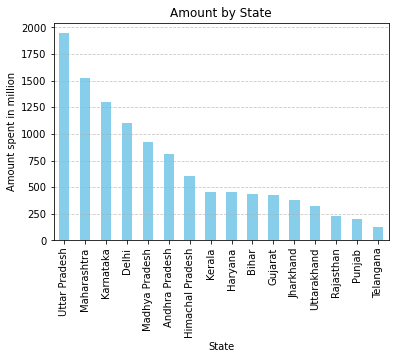

In [233]:
dfL.plot(kind="bar",color="skyblue")
plt.xlabel('State')
plt.ylabel('Amount spent in million')
plt.title('Amount by State')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [253]:
df.head(10)

,Product_Id,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00
1,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00
2,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00
3,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00
4,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00
5,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00
6,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00
8,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00
9,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99
10,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770.00


AMOUNT SPENT BY OCCUPATION

In [242]:
Occup = df.groupby("Occupation")["Amount"].sum().sort_values(ascending = False)

In [243]:
print(Occup)

Occupation
IT Sector          14755079.00
Healthcare         13034587.49
Aviation           12602298.00
Banking            10770610.95
Govt                8517212.00
Hospitality         6376405.00
Media               6295832.99
Automobile          5368596.00
Chemical            5297436.00
Lawyer              4981665.00
Retail              4783170.00
Food Processing     4070670.00
Construction        3597511.00
Textile             3204972.00
Agriculture         2593087.00
Name: Amount, dtype: float64


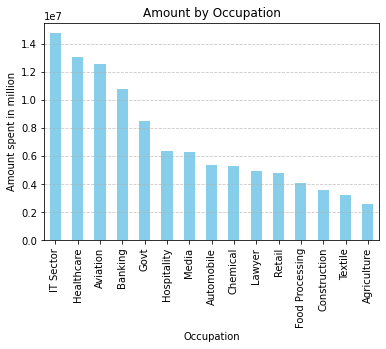

In [244]:
Occup.plot(kind="bar",color="skyblue")
plt.xlabel('Occupation')
plt.ylabel('Amount spent in million')
plt.title('Amount by Occupation')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

AMOUNT SPENT BY PRODUCT CATEGORY

In [245]:
Prod_cat = df.groupby("Product_Category")["Amount"].sum().sort_values(ascending = False)

In [246]:
print(Prod_cat)

Product_Category
Food                     33933883.50
Clothing & Apparel       16495019.00
Electronics & Gadgets    15643846.00
Footwear & Shoes         15575209.45
Furniture                 5440051.99
Games & Toys              4331694.00
Sports Products           3635933.00
Beauty                    1959484.00
Auto                      1958609.99
Stationery                1676051.50
Household items           1569337.00
Tupperware                1155642.00
Books                     1061478.00
Decor                      730360.00
Pet Care                   482277.00
Hand & Power Tools         405618.00
Veterinary                 112702.00
Office                      81936.00
Name: Amount, dtype: float64


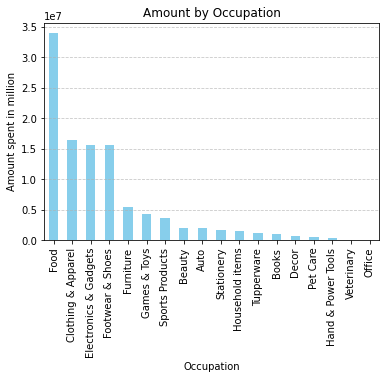

In [248]:
Prod_cat.plot(kind="bar",color="skyblue")
plt.xlabel('Occupation')
plt.ylabel('Amount spent in million')
plt.title('Amount by Occupation')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

FINAL SUMMARY ON BIVARIATE ANALYSIS: From the above analysis we understand single Female customers tend to spend more than male and the age group of 26-30 who makes the highest purchases in terms of amount spent. Partular states like Uttar pradesh, Maharashtra, Karnataka, Delhi are on the top of the list of Revenue generating locations as professionals from IT sector, Health care, Aviation, Banking and Govt job residing in these places with more disposable income spend the most. Food, clothing &appearel, electronic&gadgets , Footwear & Shoes have been the most popular products category during this Festive season of Diwali.   

MULTIVARIATE ANALYSIS

A Correlaion matrix visualization is not possible in this case as most of the columns hold categorical values.For the datasets that have many numerical columns this could be a nice way to detect correlation between independent variables and delete few columns which are strongly correlated to other, as they will contain the same information. 